# From-Scratch Neural Network Demo

This notebook demonstrates the capabilities of the custom **NumPy-only Deep Learning Framework**.

We will:
1. Load the MNIST dataset.
2. Initialize a neural network with **He Initialization** and **Adam Optimization**.
3. Train the model and visualize the loss convergence.
4. Run inference on unseen test data and visualize predictions.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add the src directory to the path so we can import the module without installing it
# This ensures the notebook works immediately for anyone cloning the repo
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from final_project.data.mnist import load_mnist
from final_project.models.nn_scratch import NNClassifier

%matplotlib inline

### 1. Load Dataset
Fetching MNIST data and normalizing it to range [0, 1].

In [2]:
print("Loading MNIST Dataset... (This may take a moment first time)")
data = load_mnist()

print(f"\nDataset Stats:")
print(f"Training Samples:   {data.X_train.shape[0]}")
print(f"Validation Samples: {data.X_val.shape[0]}")
print(f"Test Samples:       {data.X_test.shape[0]}")
print(f"Input Dimension:    {data.X_train.shape[1]}")

Loading MNIST Dataset... (This may take a moment first time)



Dataset Stats:
Training Samples:   44800
Validation Samples: 11200
Test Samples:       14000
Input Dimension:    784


### 2. Initialize Model
We configure a network with:
* **Input:** 784 neurons (28x28 pixels)
* **Hidden:** 64 neurons (ReLU activation)
* **Output:** 10 neurons (Softmax probabilities)

In [3]:
model = NNClassifier(
    input_dim=784, 
    hidden=64, 
    num_classes=10, 
    lr=0.005, 
    seed=1337
)

### 3. Training Loop
We train for a few epochs to demonstrate convergence.

In [4]:
print("Starting Training...")
model.fit(data.X_train, data.y_train, data.X_val, data.y_val, epochs=6, batch_size=128)

Starting Training...
Training on 44800 samples, Validating on 11200 samples...


Epoch 01: Train Loss 0.1389, Val Loss 0.1593, Val Acc 0.9530


Epoch 02: Train Loss 0.1051, Val Loss 0.1364, Val Acc 0.9589


Epoch 03: Train Loss 0.0652, Val Loss 0.1085, Val Acc 0.9669


Epoch 04: Train Loss 0.0545, Val Loss 0.1145, Val Acc 0.9668


Epoch 05: Train Loss 0.0451, Val Loss 0.1073, Val Acc 0.9699


Epoch 06: Train Loss 0.0539, Val Loss 0.1307, Val Acc 0.9652


### 4. Loss Visualization

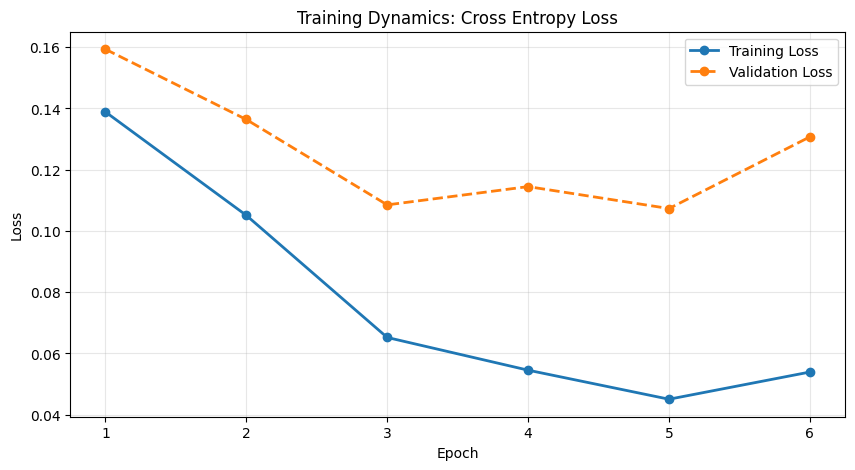

In [5]:
history = model.history
epochs_range = [x['epoch'] + 1 for x in history]
train_loss = [x['train_loss'] for x in history]
val_loss = [x['val_loss'] for x in history]

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', linestyle='--', linewidth=2)
plt.title('Training Dynamics: Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 5. Prediction Showcase
Let's visualize the model's performance on random samples from the **unseen Test Set**.

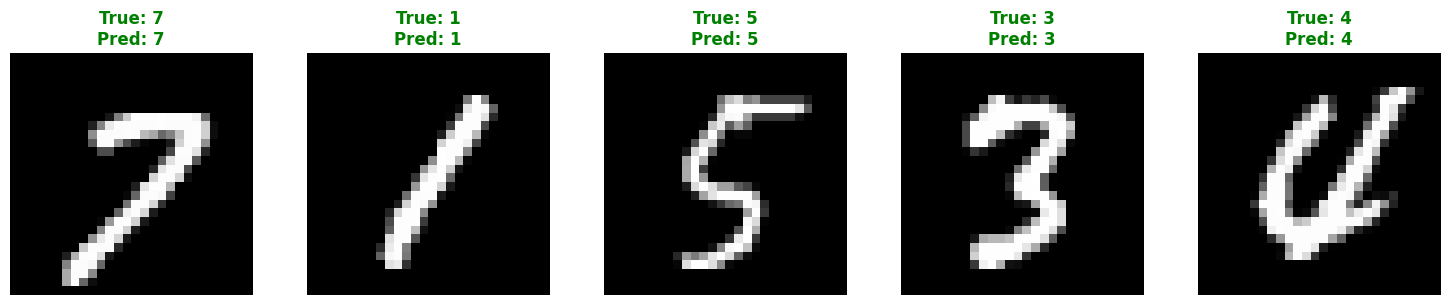

In [6]:
# Select 5 random images
indices = np.random.choice(len(data.X_test), 5, replace=False)
X_sample = data.X_test[indices]
y_true = data.y_test[indices]

# Run Inference
y_pred = model.predict(X_sample)

# Visualize
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Reshape 784 vector back to 28x28 image
    img = X_sample[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    
    # Color title based on correct/incorrect
    color = 'green' if y_pred[i] == y_true[i] else 'red'
    plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}", color=color, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()